In [4]:
!git clone https://github.com/jantic/DeOldify.git DeOldify

Cloning into 'DeOldify'...
remote: Enumerating objects: 2288, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 2288 (delta 27), reused 17 (delta 5), pack-reused 2228
Receiving objects: 100% (2288/2288), 69.44 MiB | 27.70 MiB/s, done.
Resolving deltas: 100% (1034/1034), done.


In [5]:
cd DeOldify

/content/DeOldify/DeOldify


In [6]:
#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
    print('GPU not available.')

from os import path




source_url = 'https://www.youtube.com/watch?v=u5BQb1yIoYs'

In [7]:
!pip install -r colab_requirements.txt

     |████████████████████████████████| 214 kB 5.3 MB/s 
     |████████████████████████████████| 129 kB 38.9 MB/s 
     |████████████████████████████████| 1.9 MB 42.2 MB/s 
     |████████████████████████████████| 78 kB 7.0 MB/s 
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26324 sha256=b2f3bea730a1e2702c0964e5a2e973c0cfdb43b0001e561351f1e7acec646d7a
  Stored in directory: /root/.cache/pip/wheels/35/f3/15/01aa6571f0a72ee6ae7b827c1491c37a1f72d686fd22b43b0e
Successfully built typing
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [8]:
import fastai
from deoldify.visualize import *
from pathlib import Path
torch.backends.cudnn.benchmark=True
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*?Your .*? set is empty.*?")

In [9]:
!mkdir 'models'
!wget https://data.deepai.org/deoldify/ColorizeVideo_gen.pth -O ./models/ColorizeVideo_gen.pth

--2021-10-10 14:32:58--  https://data.deepai.org/deoldify/ColorizeVideo_gen.pth
Resolving data.deepai.org (data.deepai.org)... 138.201.36.183
Connecting to data.deepai.org (data.deepai.org)|138.201.36.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874066230 (834M) [application/octet-stream]
Saving to: ‘./models/ColorizeVideo_gen.pth’

./models/ColorizeVi 100%[===================>] 833.57M  26.6MB/s    in 33s     

2021-10-10 14:33:31 (25.5 MB/s) - ‘./models/ColorizeVideo_gen.pth’ saved [874066230/874066230]



In [10]:
!wget https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png -O ./resource_images/watermark.png

--2021-10-10 14:33:31--  https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9210 (9.0K) [image/png]
Saving to: ‘./resource_images/watermark.png’

./resource_images/w 100%[===================>]   8.99K  --.-KB/s    in 0s      

2021-10-10 14:33:31 (80.8 MB/s) - ‘./resource_images/watermark.png’ saved [9210/9210]



In [11]:
colorizer = get_video_colorizer()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [12]:

render_factor = 21  #@param {type: "slider", min: 5, max: 40}
watermarked = True #@param {type:"boolean"}

if source_url is not None and source_url !='':
    video_path = colorizer.colorize_from_url(source_url, 'video.mp4', render_factor, watermarked=watermarked)
    show_video_in_notebook(video_path)
else:
    print('Provide a video url and try again.')

Output hidden; open in https://colab.research.google.com to view.

KeyboardInterrupt: ignored

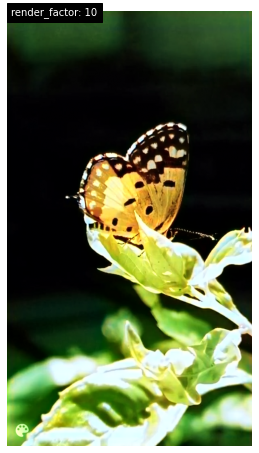

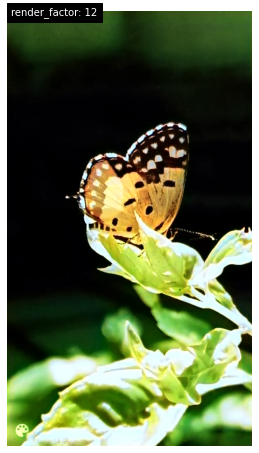

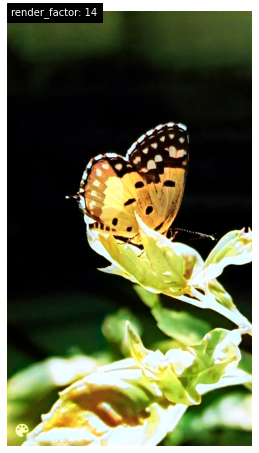

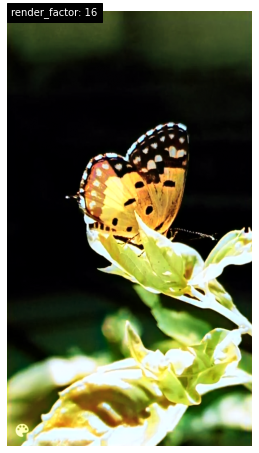

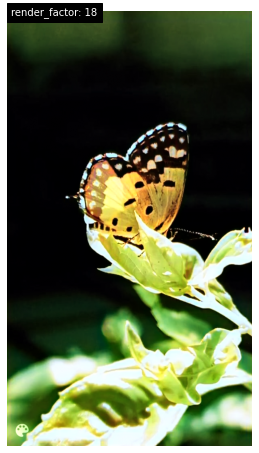

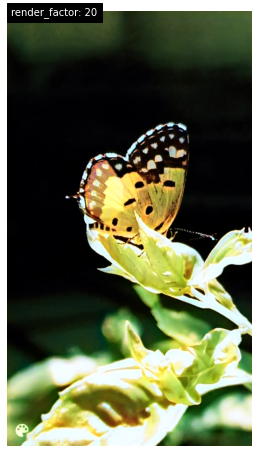

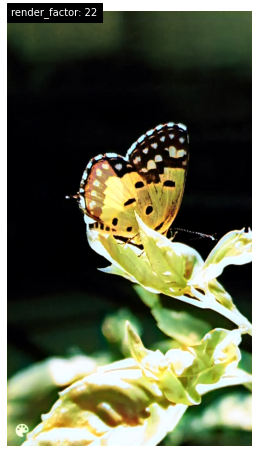

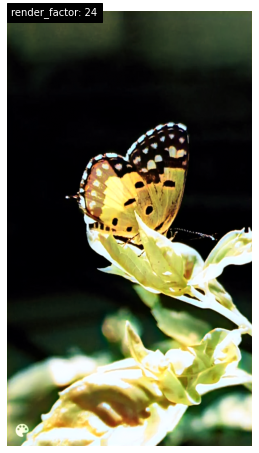

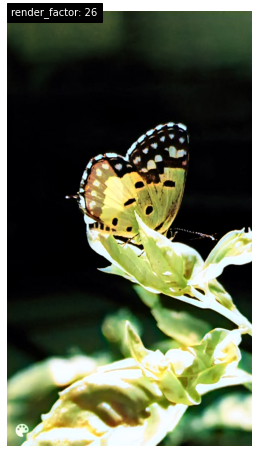

In [13]:
for i in range(10,40,2):
    colorizer.vis.plot_transformed_image('video/bwframes/video/00001.jpg', render_factor=i, display_render_factor=True, figsize=(8,8))